In [1]:
#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###### I. Création de nouvelle variable pour la classification

###### 1. Chargement des données

In [3]:
Brute_Data = pd.read_csv("/Users/macbook/Desktop/3A/UE_Coeur_A/challenge_2/Archive/challenge_youtube_toxic.csv",";",decimal=",",encoding = 'unicode_escape')

In [4]:
Brute_Data.head()

video_id_court                                          video_id  \
0    Uvvsvw_wxOs  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z   
1    mCy1ZBdttwA  VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB   
2    iU3MyHMK5nU  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V   
3    ZUim3AeURtk  VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr   
4    n5Tg2vhLCAM  VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN   

                 channel_id  nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  \
0  UC9GGzAhhvhJO1hL10-BcgNA    3813             18             4        145   
1  UCXKJrYczY2_fJEZgFPGY0HQ      28              2             0          1   
2  UC9GGzAhhvhJO1hL10-BcgNA    3804             68             9         56   
3  UCbZ0Csr9ow6Xjkdd542Omhw       4              0             1          2   
4  UChZWs6PJY0hND384d2_RrhQ     737              3             1         18   

   nbrExclMark  nbrQuestMark  nbrMotMoyenne  ...  discussion_count  \
0           79            60      30.261900  ...                28   
1            0             0       9.333333  ...                 0   
2           75            54      27.565220  ...                22   
3            0             0       2.000000  ...                 0   
4            5             6      32.043478  ...                 4   

   distinct_authors_count  authors_3channels_count  liked_authors_count  \
0                      58                       47                   23   
1                       3                        1                    0   
2                      83                       49                   36   
3                       2                        0                    0   
4                      18                        7                    7   

   channel_name  subscriberCount  viewCount  categorie_new        categ_inst  \
0    LeHuffPost           339922  225393312           Core      Pure Players   
1         CNEWS           189971  132125693           Core                TV   
2    LeHuffPost           339922  225393312           Core      Pure Players   
3    Telegramme             2862    2481100          Niche  Presse_regionale   
4     Les Echos            30010    6710737           Core  Presse nationale   

   Unnamed: 27  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 28 columns]

###### 2. Encodage des attributs qualitatives pour la recherche de corrélation

In [5]:
Brute_Data["channel_name"] = Brute_Data["channel_name"].astype('category')
Brute_Data["categorie_new"] = Brute_Data["categorie_new"].astype('category')
Brute_Data["categ_inst"] = Brute_Data["categ_inst"].astype('category')

In [6]:
Brute_Data["channel_name"] = Brute_Data["channel_name"].cat.codes
Brute_Data["categorie_new"] = Brute_Data["categorie_new"].cat.codes
Brute_Data["categ_inst"] = Brute_Data["categ_inst"].cat.codes

###### 3. Suppression de colones inutiles

In [7]:
Brute_Data_ = Brute_Data.drop(columns=["video_id_court","video_id","channel_id","Unnamed: 27"])

###### 4. suppression des valeurs outlier pour créer notre indice de toxicité

In [8]:
Brute_Data_=Brute_Data_.drop(labels=[14922], axis=0) # nbrMotInsulte outlier
Brute_Data_=Brute_Data_.drop(labels=[39864], axis=0) # nbrMotInsulte > nbrMot

In [9]:
# Normalisation de nos données 
#normalized_Data=(Brute_Data_-Brute_Data_.mean())/Brute_Data_.std()
normalized_Data=(Brute_Data_-Brute_Data_.min())/(Brute_Data_.max()-Brute_Data_.min())

In [10]:
normalized_Data

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
0      0.012769       0.004636      0.003387   0.024526     0.010077   
1      0.000094       0.000515      0.000000   0.000169     0.000000   
2      0.012739       0.017512      0.007621   0.009472     0.009566   
3      0.000013       0.000000      0.000847   0.000338     0.000000   
4      0.002468       0.000773      0.000847   0.003045     0.000638   
...         ...            ...           ...        ...          ...   
46097  0.000054       0.000000      0.000000   0.000000     0.000383   
46098  0.000764       0.000258      0.000847   0.000000     0.000000   
46099  0.000961       0.000515      0.000000   0.000507     0.000255   
46100  0.000589       0.000000      0.000000   0.000000     0.000765   
46101  0.055617       0.039145      0.055885   0.056664     0.022577   

       nbrQuestMark  nbrMotMoyenne  nbrMotInsulteMoyenne  nbrMotAllongMoyenne  \
0          0.023520       0.022425              0.010204             0.001134   
1          0.000000       0.006916              0.047619             0.000000   
2          0.021168       0.020426              0.035197             0.002329   
3          0.000000       0.001482              0.000000             0.017857   
4          0.002352       0.023745              0.009317             0.001553   
...             ...            ...                   ...                  ...   
46097      0.000000       0.003952              0.000000             0.000000   
46098      0.000392       0.168951              0.071429             0.035714   
46099      0.000000       0.026584              0.017857             0.000000   
46100      0.001176       0.043473              0.000000             0.000000   
46101      0.070169       0.016676              0.014712             0.003194   

       nbrMotMAJMoyenne  ...  message_count  discussion_count  \
0              0.007104  ...       0.012002          0.031603   
1              0.002058  ...       0.000192          0.000000   
2              0.002505  ...       0.013154          0.024831   
3              0.006173  ...       0.000096          0.000000   
4              0.004831  ...       0.002112          0.004515   
...                 ...  ...            ...               ...   
46097          0.000000  ...       0.000192          0.000000   
46098          0.000000  ...       0.000000          0.000000   
46099          0.002315  ...       0.000672          0.000000   
46100          0.000000  ...       0.000192          0.001129   
46101          0.002802  ...       0.070763          0.054176   

       distinct_authors_count  authors_3channels_count  liked_authors_count  \
0                    0.006639                 0.028624             0.009481   
1                    0.000233                 0.000609             0.000000   
2                    0.009552                 0.029842             0.014839   
3                    0.000116                 0.000000             0.000000   
4                    0.001980                 0.004263             0.002885   
...                       ...                      ...                  ...   
46097                0.000233                 0.000609             0.000000   
46098                0.000000                 0.000000             0.000000   
46099                0.000699                 0.003045             0.001237   
46100                0.000233                 0.000000             0.000412   
46101                0.051136                 0.169306             0.058120   

       channel_name  subscriberCount  viewCount  categorie_new  categ_inst  
0          0.543860         0.597807   0.933548            0.0         0.8  
1          0.087719         0.334094   0.547193            0.0         1.0  
2          0.543860         0.597807   0.933548            0.0         0.8  
3          0.877193         0.005033   0.010149            0.5         0.6  
4          0.578947         0.052777   0.027670         

##### 5. Création de l'indice de toxicité

$ I_i=\sum_{j=0}^{m} Corr(X_{ij},nbrMotInsulte)\times x_{ij}$
 - avec m le nombre de colonne 
 - $ I_{i}$ désigne l'indice de toxicité
 - $ x_{ij}$ désigne la valeur de la colonne $j$
 

In [11]:
# implémentation de l'indice de toxcité
normalized_Data_=normalized_Data
normalized_Data_['Tox_Index']=0
for col in normalized_Data.columns:
    Temp=0
    Temp = normalized_Data[col]*normalized_Data['nbrMotInsulte'].corr(normalized_Data[col])
    normalized_Data_['Tox_Index']=normalized_Data_['Tox_Index']+Temp

In [12]:
normalized_Data_

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
0      0.012769       0.004636      0.003387   0.024526     0.010077   
1      0.000094       0.000515      0.000000   0.000169     0.000000   
2      0.012739       0.017512      0.007621   0.009472     0.009566   
3      0.000013       0.000000      0.000847   0.000338     0.000000   
4      0.002468       0.000773      0.000847   0.003045     0.000638   
...         ...            ...           ...        ...          ...   
46097  0.000054       0.000000      0.000000   0.000000     0.000383   
46098  0.000764       0.000258      0.000847   0.000000     0.000000   
46099  0.000961       0.000515      0.000000   0.000507     0.000255   
46100  0.000589       0.000000      0.000000   0.000000     0.000765   
46101  0.055617       0.039145      0.055885   0.056664     0.022577   

       nbrQuestMark  nbrMotMoyenne  nbrMotInsulteMoyenne  nbrMotAllongMoyenne  \
0          0.023520       0.022425              0.010204             0.001134   
1          0.000000       0.006916              0.047619             0.000000   
2          0.021168       0.020426              0.035197             0.002329   
3          0.000000       0.001482              0.000000             0.017857   
4          0.002352       0.023745              0.009317             0.001553   
...             ...            ...                   ...                  ...   
46097      0.000000       0.003952              0.000000             0.000000   
46098      0.000392       0.168951              0.071429             0.035714   
46099      0.000000       0.026584              0.017857             0.000000   
46100      0.001176       0.043473              0.000000             0.000000   
46101      0.070169       0.016676              0.014712             0.003194   

       nbrMotMAJMoyenne  ...  discussion_count  distinct_authors_count  \
0              0.007104  ...          0.031603                0.006639   
1              0.002058  ...          0.000000                0.000233   
2              0.002505  ...          0.024831                0.009552   
3              0.006173  ...          0.000000                0.000116   
4              0.004831  ...          0.004515                0.001980   
...                 ...  ...               ...                     ...   
46097          0.000000  ...          0.000000                0.000233   
46098          0.000000  ...          0.000000                0.000000   
46099          0.002315  ...          0.000000                0.000699   
46100          0.000000  ...          0.001129                0.000233   
46101          0.002802  ...          0.054176                0.051136   

       authors_3channels_count  liked_authors_count  channel_name  \
0                     0.028624             0.009481      0.543860   
1                     0.000609             0.000000      0.087719   
2                     0.029842             0.014839      0.543860   
3                     0.000000             0.000000      0.877193   
4                     0.004263             0.002885      0.578947   
...                        ...                  ...           ...   
46097                 0.000609             0.000000      0.508772   
46098                 0.000000             0.000000      0.473684   
46099                 0.003045             0.001237      0.087719   
46100                 0.000000             0.000412      0.456140   
46101                 0.169306             0.058120      0.543860   

       subscriberCount  viewCount  categorie_new  categ_inst  Tox_Index  
0             0.597807   0.933548            0.0         0.8   0.553539  
1             0.334094   0.547193            0.0         1.0   0.196185  
2             0.597807   0.933548            0.0         0.8   0.568384  
3             0.005033   0.010149            0.5         0.6   0.018397  
4             0.052777   0.027670            0.0         0.4   0.088720  
...      

In [13]:
#normalize index to 0% - 100%
normalized_Data_['Tox_Index']= 100*(normalized_Data_['Tox_Index']- normalized_Data_['Tox_Index'].min())/(normalized_Data_['Tox_Index'].max()-normalized_Data_['Tox_Index'].min())


- on normalise l'indice de toxicité sur un intervalle de 0% à 100% 

In [14]:
display(normalized_Data_['Tox_Index'].min())
display(normalized_Data_['Tox_Index'].max())

0.0

99.99999999999999

###### 6. Association de classe (Target ) à notre indice

In [15]:
normalized_Data_['Tox_Class']=0

for index, row in normalized_Data_.iterrows():
    if normalized_Data_.at[index,'Tox_Index']<=2:
        normalized_Data_.at[index,'Tox_Class']=0
    elif 2<normalized_Data_.at[index,'Tox_Index']<=20:
        normalized_Data_.at[index,'Tox_Class']=1
    elif 20<normalized_Data_.at[index,'Tox_Index']:
        normalized_Data_.at[index,'Tox_Class']=2   

- On encode notre indice de toxicité à deux classes que sont:
  - 0 : Non toxique
  - 1 : Toxique
  - 2 : Très toxique

In [16]:
df=normalized_Data_

In [17]:
df

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
0      0.012769       0.004636      0.003387   0.024526     0.010077   
1      0.000094       0.000515      0.000000   0.000169     0.000000   
2      0.012739       0.017512      0.007621   0.009472     0.009566   
3      0.000013       0.000000      0.000847   0.000338     0.000000   
4      0.002468       0.000773      0.000847   0.003045     0.000638   
...         ...            ...           ...        ...          ...   
46097  0.000054       0.000000      0.000000   0.000000     0.000383   
46098  0.000764       0.000258      0.000847   0.000000     0.000000   
46099  0.000961       0.000515      0.000000   0.000507     0.000255   
46100  0.000589       0.000000      0.000000   0.000000     0.000765   
46101  0.055617       0.039145      0.055885   0.056664     0.022577   

       nbrQuestMark  nbrMotMoyenne  nbrMotInsulteMoyenne  nbrMotAllongMoyenne  \
0          0.023520       0.022425              0.010204             0.001134   
1          0.000000       0.006916              0.047619             0.000000   
2          0.021168       0.020426              0.035197             0.002329   
3          0.000000       0.001482              0.000000             0.017857   
4          0.002352       0.023745              0.009317             0.001553   
...             ...            ...                   ...                  ...   
46097      0.000000       0.003952              0.000000             0.000000   
46098      0.000392       0.168951              0.071429             0.035714   
46099      0.000000       0.026584              0.017857             0.000000   
46100      0.001176       0.043473              0.000000             0.000000   
46101      0.070169       0.016676              0.014712             0.003194   

       nbrMotMAJMoyenne  ...  distinct_authors_count  authors_3channels_count  \
0              0.007104  ...                0.006639                 0.028624   
1              0.002058  ...                0.000233                 0.000609   
2              0.002505  ...                0.009552                 0.029842   
3              0.006173  ...                0.000116                 0.000000   
4              0.004831  ...                0.001980                 0.004263   
...                 ...  ...                     ...                      ...   
46097          0.000000  ...                0.000233                 0.000609   
46098          0.000000  ...                0.000000                 0.000000   
46099          0.002315  ...                0.000699                 0.003045   
46100          0.000000  ...                0.000233                 0.000000   
46101          0.002802  ...                0.051136                 0.169306   

       liked_authors_count  channel_name  subscriberCount  viewCount  \
0                 0.009481      0.543860         0.597807   0.933548   
1                 0.000000      0.087719         0.334094   0.547193   
2                 0.014839      0.543860         0.597807   0.933548   
3                 0.000000      0.877193         0.005033   0.010149   
4                 0.002885      0.578947         0.052777   0.027670   
...                    ...           ...              ...        ...   
46097             0.000000      0.508772         0.262072   0.354199   
46098             0.000000      0.473684         1.000000   0.557320   
46099             0.001237      0.087719         0.334094   0.547193   
46100             0.000412      0.456140         0.316863   0.580373   
46101             0.058120      0.543860         0.597807   0.933548   

       categorie_new  categ_inst  Tox_Index  Tox_Class  
0                0.0         0.8   4.881427          1  
1                0.0         1.0   2.059316          1  
2                0.0         0.8   4.998659          1  
3                0.5         0.6   0.655289          0  
4                0.0         0.4   1.210644     

In [18]:
df['Tox_Class'].value_counts()

0    26957
1    18928
2      215
Name: Tox_Class, dtype: int64

In [19]:
#New Data profiling
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46100 entries, 0 to 46101
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nbrMot                   46100 non-null  float64
 1   nbrMotInsulte            46100 non-null  float64
 2   nbrMotAllong             46100 non-null  float64
 3   nbrMotMAJ                46100 non-null  float64
 4   nbrExclMark              46100 non-null  float64
 5   nbrQuestMark             46100 non-null  float64
 6   nbrMotMoyenne            46100 non-null  float64
 7   nbrMotInsulteMoyenne     46100 non-null  float64
 8   nbrMotAllongMoyenne      46100 non-null  float64
 9   nbrMotMAJMoyenne         46100 non-null  float64
 10  nbrExclMarkMoyenne       46100 non-null  float64
 11  nbrQuestMarkMoyenne      46100 non-null  float64
 12  thread_count             46100 non-null  float64
 13  comment_count            46100 non-null  float64
 14  message_count         

In [20]:
#Confirmation qu'il n'y a pas de valeurs nulles
df.isnull().values.any()

False

Pour visualiser comment les valeurs de chaque caractéristique sont distribuées, nous traçons des histogrammes de toutes les caractéristiques. Ces graphiques suggèrent que les caractéristiques ne suivent pas une distribution normale

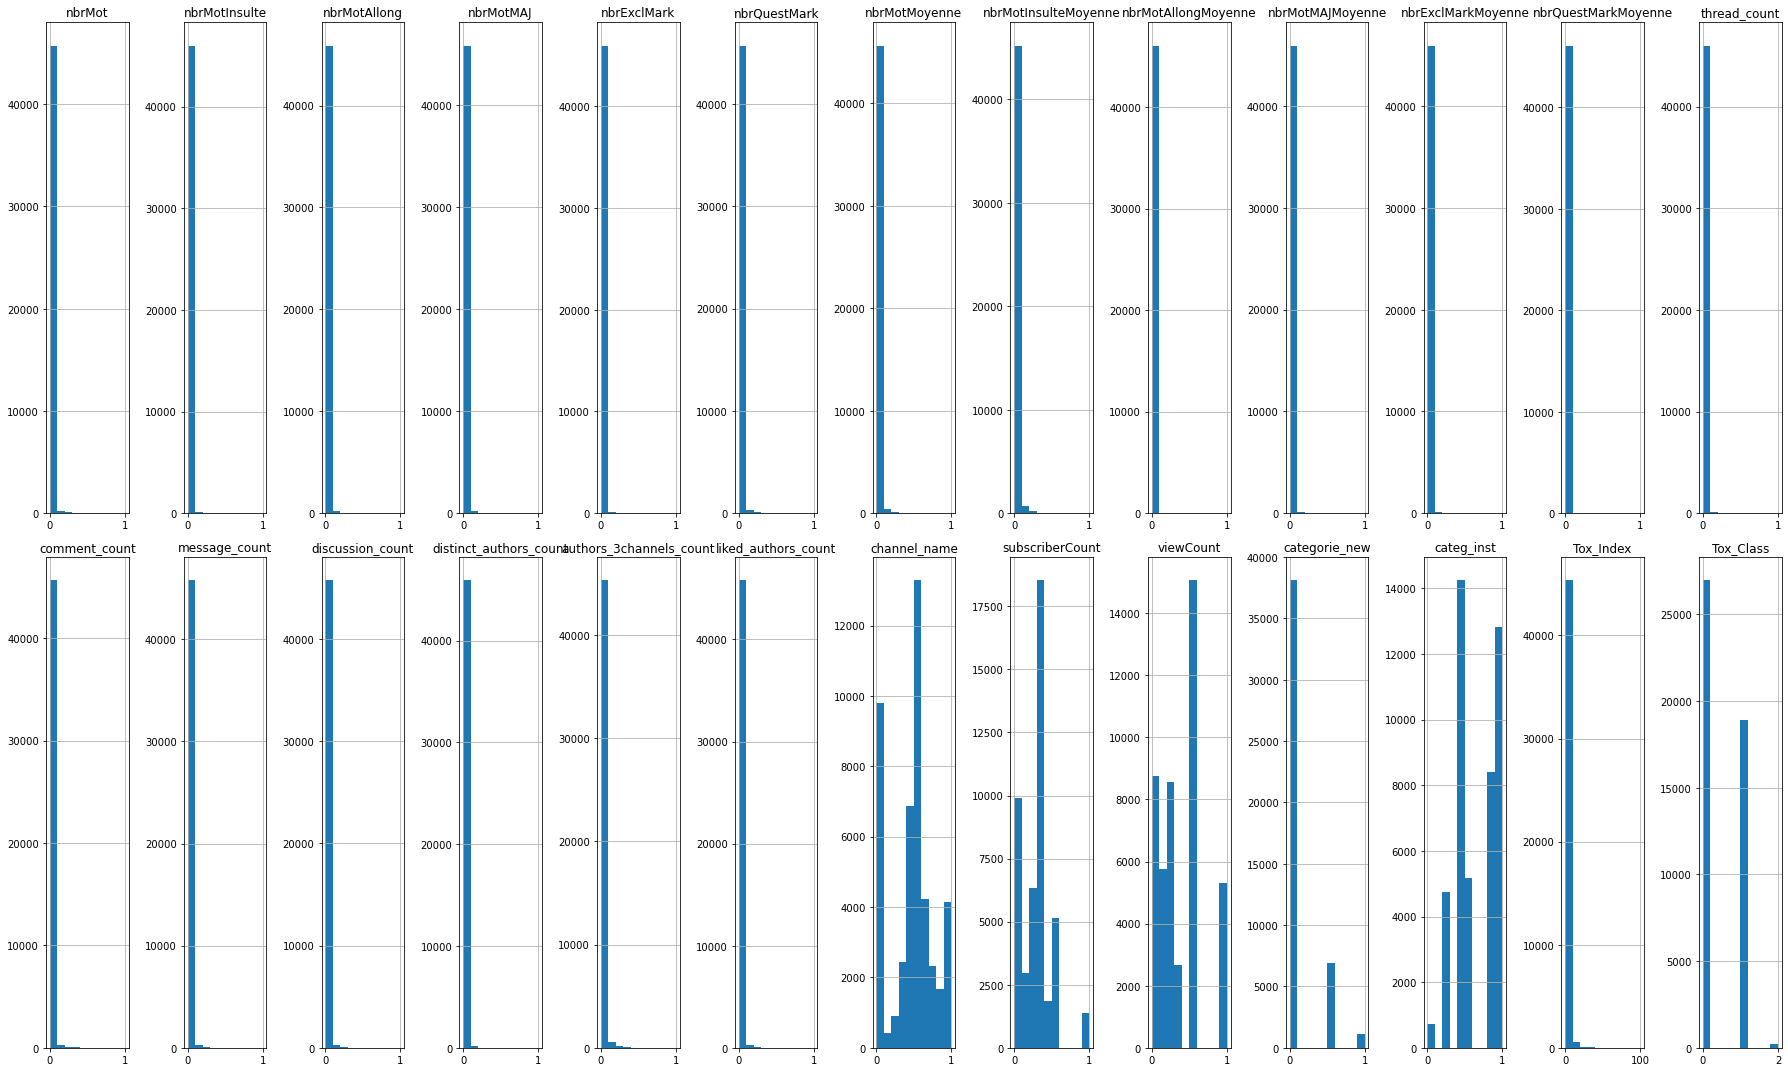

In [21]:
I, J = 2, 13
fig, axis = plt.subplots(I, J)
cols = df.columns.tolist()
for i in range(I):
    for j in range(J):
        axis[i, j].hist(df.iloc[:, J*i+j])
        axis[i, j].grid(True)
        axis[i, j].set_title(cols[i*J + j])
fig.set_figwidth(25)
fig.set_figheight(15)
plt.tight_layout()
plt.show()

On fait un zoom pour l'indice de toxicité

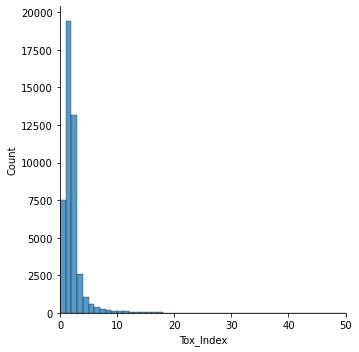

In [22]:
import seaborn as sns
ax=sns.displot(df, x="Tox_Index", binwidth=1)
ax.set(xlim=(0, 50))

###### II.  Machine learning

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

on scinde ici notre data set en deux parties dont 80% des données vont constyituer nos données d'entraînement et 20% nos données de test.

In [25]:
# taille de nos données d'entraînement

trainset.shape

(36880, 26)

In [26]:
df

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
0      0.012769       0.004636      0.003387   0.024526     0.010077   
1      0.000094       0.000515      0.000000   0.000169     0.000000   
2      0.012739       0.017512      0.007621   0.009472     0.009566   
3      0.000013       0.000000      0.000847   0.000338     0.000000   
4      0.002468       0.000773      0.000847   0.003045     0.000638   
...         ...            ...           ...        ...          ...   
46097  0.000054       0.000000      0.000000   0.000000     0.000383   
46098  0.000764       0.000258      0.000847   0.000000     0.000000   
46099  0.000961       0.000515      0.000000   0.000507     0.000255   
46100  0.000589       0.000000      0.000000   0.000000     0.000765   
46101  0.055617       0.039145      0.055885   0.056664     0.022577   

       nbrQuestMark  nbrMotMoyenne  nbrMotInsulteMoyenne  nbrMotAllongMoyenne  \
0          0.023520       0.022425              0.010204             0.001134   
1          0.000000       0.006916              0.047619             0.000000   
2          0.021168       0.020426              0.035197             0.002329   
3          0.000000       0.001482              0.000000             0.017857   
4          0.002352       0.023745              0.009317             0.001553   
...             ...            ...                   ...                  ...   
46097      0.000000       0.003952              0.000000             0.000000   
46098      0.000392       0.168951              0.071429             0.035714   
46099      0.000000       0.026584              0.017857             0.000000   
46100      0.001176       0.043473              0.000000             0.000000   
46101      0.070169       0.016676              0.014712             0.003194   

       nbrMotMAJMoyenne  ...  distinct_authors_count  authors_3channels_count  \
0              0.007104  ...                0.006639                 0.028624   
1              0.002058  ...                0.000233                 0.000609   
2              0.002505  ...                0.009552                 0.029842   
3              0.006173  ...                0.000116                 0.000000   
4              0.004831  ...                0.001980                 0.004263   
...                 ...  ...                     ...                      ...   
46097          0.000000  ...                0.000233                 0.000609   
46098          0.000000  ...                0.000000                 0.000000   
46099          0.002315  ...                0.000699                 0.003045   
46100          0.000000  ...                0.000233                 0.000000   
46101          0.002802  ...                0.051136                 0.169306   

       liked_authors_count  channel_name  subscriberCount  viewCount  \
0                 0.009481      0.543860         0.597807   0.933548   
1                 0.000000      0.087719         0.334094   0.547193   
2                 0.014839      0.543860         0.597807   0.933548   
3                 0.000000      0.877193         0.005033   0.010149   
4                 0.002885      0.578947         0.052777   0.027670   
...                    ...           ...              ...        ...   
46097             0.000000      0.508772         0.262072   0.354199   
46098             0.000000      0.473684         1.000000   0.557320   
46099             0.001237      0.087719         0.334094   0.547193   
46100             0.000412      0.456140         0.316863   0.580373   
46101             0.058120      0.543860         0.597807   0.933548   

       categorie_new  categ_inst  Tox_Index  Tox_Class  
0                0.0         0.8   4.881427          1  
1                0.0         1.0   2.059316          1  
2                0.0         0.8   4.998659          1  
3                0.5         0.6   0.655289          0  
4                0.0         0.4   1.210644     

In [27]:
def delete_colomn(df):
    df=df.drop(["nbrMotInsulte","Tox_Index"],axis=1)
    return df

dans la fonction ci-dessus nous définissons une fonction qui va nous permettre de supprimer la variable "nbrMotInsulte" vu que nous nous en sommes servis pour déterminer notre indice de toxicité.

In [28]:
def preprocessing(df):

    df = delete_colomn(df)
    
    X = df.drop("Tox_Class", axis=1)
    y = df["Tox_Class"]
    
    return X, y

In [29]:
X_train, y_train = preprocessing(trainset)

In [30]:
X_test,y_test=preprocessing(df)

In [31]:
y_test.shape

(46100,)

Le code ci-dessus nous permet d'extraire notre target "Tox_Class" du dataset avant de démarrer l'évaluation du modèle

In [32]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [38]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
   # N, train_score, val_score = learning_curve(model, X_train, y_train,
   #                                           cv=4, scoring='f1',
   #                                            train_sizes=np.linspace(0.1, 1, 10))
    
    
 #   plt.figure(figsize=(12, 8))
  #  plt.plot(N, train_score.mean(axis=1), label='train score')
  #  plt.plot(N, val_score.mean(axis=1), label='validation score')
 #   plt.legend()

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [40]:
RandomForest = RandomForestClassifier(random_state=0)
AdaBoost = AdaBoostClassifier(random_state=0)
SVM = SVC(random_state=0)
KNN = KNeighborsClassifier()

In [41]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [42]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

RandomForest
[[26941    16     0]
 [   38 18887     3]
 [    0     3   212]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26957
           1       1.00      1.00      1.00     18928
           2       0.99      0.99      0.99       215

    accuracy                           1.00     46100
   macro avg       0.99      0.99      0.99     46100
weighted avg       1.00      1.00      1.00     46100

AdaBoost
[[22648  4309     0]
 [ 2930 15955    43]
 [    0   105   110]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     26957
           1       0.78      0.84      0.81     18928
           2       0.72      0.51      0.60       215

    accuracy                           0.84     46100
   macro avg       0.80      0.73      0.76     46100
weighted avg       0.84      0.84      0.84     46100

SVM
[[26432   525     0]
 [ 2081 16847     0]
 [    0    30   185]]
              precis

- D'après la sortie précédente , on remarque que le meilleur modèle est le SVM
 - on obtient un meilleur score et une classification avec la matrice de confusion



###### Optimisation

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
SVM

SVC(random_state=0)

In [48]:
hyper_params = {'gamma':[1e-3, 1e-4, 0.0005],
                'C':[1, 10, 100, 1000, 3000]}

In [ ]:
grid_svm = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid_svm.fit(X_train, y_train)

print(grid_svm.best_params_)

y_pred = grid_svm.predict(X_test)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 15 is smaller than n_iter=40. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1771, in recall_score
    _, r, _, _ = prec